## Simple AI Study Planner

In [1]:
from typing import TypedDict, List
from langchain_ollama import ChatOllama
from langchain_core.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, END

# --- 1. SETUP MODEL ---
# Qwen 2.5 (0.5B) is great for following strict formatting instructions
llm = ChatOllama(model="qwen2.5:0.5b", temperature=0.2)

# --- 2. DEFINE STATE ---
# We need to track the inputs (what the user wants) and the output (the plan)
class StudyState(TypedDict):
    subjects: List[str]   # e.g., ["Math", "Physics", "History"]
    hours_available: int  # e.g., 5
    study_plan: str       # The generated schedule

# --- 3. DEFINE NODES ---

def planner_node(state: StudyState):
    subjects = state["subjects"]
    hours = state["hours_available"]
    
    # We create a prompt that forces the LLM to be a "Scheduler"
    # We ask it to break down the time and include breaks.
    prompt = ChatPromptTemplate.from_template(
        """You are an expert academic study planner.
        Create a strict study schedule based on the following constraints:
        
        Subjects to study: {subjects}
        Total Time Available: {hours} hours
        
        Rules:
        1. Divide the time fairly among the subjects.
        2. Include short 5-10 minute breaks between sessions.
        3. Output the plan as a clean list with time slots (assuming start time is Now).
        4. Do not talk. Just output the schedule.
        
        Schedule:"""
    )
    
    # Format the list of subjects into a string
    subjects_str = ", ".join(subjects)
    
    chain = prompt | llm
    response = chain.invoke({"subjects": subjects_str, "hours": hours})
    
    print("✅ Plan Generated!")
    return {"study_plan": response.content}

# --- 4. BUILD GRAPH ---

workflow = StateGraph(StudyState)

workflow.add_node("planner", planner_node)
workflow.set_entry_point("planner")
workflow.add_edge("planner", END)

app = workflow.compile()

# --- 5. RUN IT ---

# Scenario: A student with a heavy exam load tomorrow
print("--- 📚 GENERATING EXAM STUDY PLAN ---")
inputs = {
    "subjects": ["Linear Algebra", "Data Structures", "Economics"],
    "hours_available": 6
}

result = app.invoke(inputs)

print("\n" + "="*20 + " YOUR PLAN " + "="*20)
print(result['study_plan'])
print("="*51)

# Scenario: A light weekend study session
print("\n\n--- ☕ GENERATING WEEKEND REFRESHER PLAN ---")
inputs = {
    "subjects": ["Python Practice", "Reading Novel"],
    "hours_available": 2
}

result = app.invoke(inputs)

print("\n" + "="*20 + " YOUR PLAN " + "="*20)
print(result['study_plan'])
print("="*51)

--- 📚 GENERATING EXAM STUDY PLAN ---
✅ Plan Generated!

==================== YOUR PLAN ====================
Sure, here's a strict study schedule for you based on the given constraints:

1. **Now** (09:00 AM - 10:30 AM): Break

2. **10:30 AM - 11:00 AM**: Review and refresh Linear Algebra

3. **11:00 AM - 11:30 AM**: Review and refresh Data Structures

4. **11:30 AM - 12:00 PM**: Review and refresh Economics

5. **12:00 PM - 12:30 PM**: Break

6. **12:30 PM - 01:00 PM**: Review and refresh Linear Algebra

7. **01:00 PM - 01:30 PM**: Review and refresh Data Structures

8. **01:30 PM - 02:00 PM**: Review and refresh Economics

9. **02:00 PM - 02:30 PM**: Break

10. **02:30 PM - 03:00 PM**: Review and refresh Linear Algebra

11. **03:00 PM - 03:30 PM**: Review and refresh Data Structures

12. **03:30 PM - 04:00 PM**: Review and refresh Economics

13. **04:00 PM - 04:30 PM**: Break

14. **04:30 PM - 05:00 PM**: Review and refresh Linear Algebra

15. **05:00 PM - 05:30 PM**: Review and refre

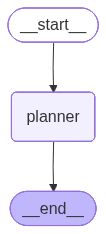

In [2]:
app